In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import os
import psi4
os.chdir('/home/ch3859/comp-class/comp-lab-class/Week10/')

### Running a basic Hartree-Fock calculation

__HF/cc-pVDZ H2O Computation__

In [4]:
%%time
#! Sample HF/cc-pVDZ H2O Computation
psi4.core.set_output_file('HF_cc-pVDZ_h2o_output.dat', False)
psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

CPU times: user 281 ms, sys: 8.35 ms, total: 290 ms
Wall time: 296 ms


-76.0266327350902

__UHF/6-31G** CH2 Computation__

In [6]:
%%time
#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

psi4.core.set_output_file('UHF_6-31G**_ch2_output.dat', False)
ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

CPU times: user 276 ms, sys: 8.46 ms, total: 285 ms
Wall time: 293 ms


-38.92533462893707

### Geometry Optimization and Vibrational Frequency Analysis

In [7]:
%%time
# geometry optimization for H2O

psi4.core.set_output_file('h2o_geo_opt_output.dat', False)
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!
CPU times: user 835 ms, sys: 42.9 ms, total: 878 ms
Wall time: 888 ms


-76.02703272937481

__harmonic vibrational frequency calculation__

In [8]:
%%time

psi4.core.set_output_file('h2o_vib_freq_output.dat', False)
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

CPU times: user 966 ms, sys: 46.8 ms, total: 1.01 s
Wall time: 1.02 s


### Analysis of Intermolecular Interactions

In [11]:
%%time
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

psi4.core.set_output_file('ethene_ethyne_interaction_output.dat', False)
dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

CPU times: user 3.71 s, sys: 274 ms, total: 3.98 s
Wall time: 4.27 s


-0.0022355823909805178

### Potential Surface Scans and Counterpoise Correction

In [12]:
%%time
#! Example potential energy surface scan and CP-correction for Ne2
psi4.core.set_output_file('ne2_PESscan_output.dat', False)

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.46 s, sys: 1.65 s, total: 7.1 s
Wall time: 1min 2s


### Potential energy surface scan for Ar2

In [16]:
%%time

psi4.core.set_output_file('ar2_PESscan_output.dat', False)

ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = np.arange(3.5, 6, 0.25)
E_int_vals = []

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))
    E_int_vals.append(e)

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            3.8                        -0.069454
            4.0                        -0.122889
            4.2                        -0.116450
            4.5                        -0.095152
            4.8                        -0.073689
            5.0                        -0.055968
            5.2                        -0.042323
            5.5                        -0.032099
            5.8                        -0.024511
CPU times: user 59.5 s, sys: 6.26 s, total: 1min 5s
Wall time: 1min 35s


### Fit the PES curve of Ar2 to the LJ function

In [17]:
# define the LJ potential
def lj(r,sigma,eps):
    return 4*eps*((sigma/r)**12-(sigma/r)**6)

In [19]:
# fit the curve using scipy.optimize.curve_fit
from scipy.optimize import curve_fit

popt, pcov = curve_fit(lj, Rvals, E_int_vals)
popt

array([3.64331676, 0.12048766])

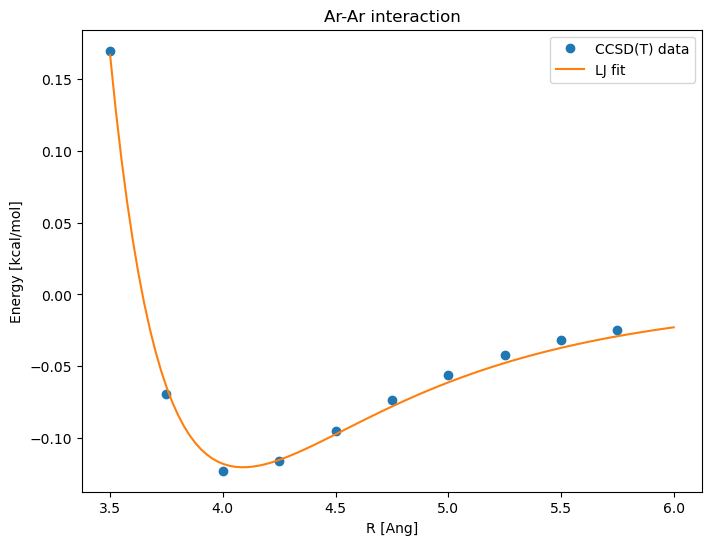

In [23]:
# draw the fit curve with the data
plt.figure(figsize=(8,6))
plt.plot(Rvals, E_int_vals, 'o', label='CCSD(T) data')

lj_fit_r = np.linspace(3.5, 6, 100)
plt.plot(lj_fit_r, lj(lj_fit_r, *popt), label='LJ fit')
plt.xlabel('R [Ang]')
plt.ylabel('Energy [kcal/mol]')
plt.legend()
plt.title('Ar-Ar interaction')
plt.savefig('Figures/Ar-Ar_interaction.pdf', bbox_inches='tight')
plt.show()